# Coordinate Annotation Experiment

The purpose of this notebook is to evaluate which graph layout algorithms are potentially helpful for an informed search algorithm, such as A* or Dijkstra's algorithm.


In [1]:
# correct working directory.
# This is necessary for imports because the notebook is not in the main folder of the project. 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

# library imports
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True 
import igraph as ig



c:\Users\frank\Documents\Teaching\LU\Planning and Optimization LU - Material\Planning Example Project\planning_example_project


c:\Users\frank\Documents\Teaching\LU\Planning and Optimization LU - Material\Planning Example Project\planning_example_project\env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]



## Procedure

We will test all applicable layout algorithms provided by the igraph library. An algorithm is considered applicable if it can work with any directed graph. Algorithms that require specific types of graphs, like bipartite graphs or trees are skipped. A list of algorithms can be found here: https://igraph.org/python/tutorial/0.9.6/visualisation.html#graph-layouts

For each algorithm we go through the following steps:
- The algorithm is run on a simple graph with 10 nodes.
- The result is plotted as image.
- The image is discussed with respect to the following criteria:
    - are nodes connected by edges closer together?
    - Do edges have a somewhat uniform length? This is more of a soft criterium. While informed search algorithms would still be applicable with extreme differences in edge lengths, such differences would mean that the search space would not be searched uniformly. We will consider differences up to a factor of 5 to be acceptable.

We will conclude this experiment by summarizing which layouts are suitable for further experimentation.


The functions used for experimentation are defined below.

In [4]:
# define helper function
def get_layouted_graph(layout_description):
    edges = [(0,1),(1,2),(1,3),(3,4),(4,0), (2,6), (6,7), (7,8), (2,8), (8,5), (0,8), (9,9)]
    g = ig.Graph(edges=edges, directed = True);
    g.vs["name"] = ["0","1","2","3","4","5","6","7","8","9"]
    layout = g.layout(layout=layout_description)
    return g, layout

def test_layout(layout_name):
    igraph, layout = get_layouted_graph(layout_name)

    print("Calculated Coordinates: ")
    for node in range(9):
        print(node, layout.coords[node])

    print("Calculated Layout: ")
    return ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])	

## Results

In the following we test and visualize all candidates.

### Automated layout


Calculated Coordinates: 
0 [0.305468976474268, 0.28155305563656235]
1 [1.2904752116973242, -0.3503015375833418]
2 [0.5369468339639477, -1.3010309408741563]
3 [1.842506053131274, 0.6148415624063556]
4 [0.9791722764114885, 1.2292042222715223]
5 [-1.785329823231644, -0.3586709470173655]
6 [0.08848997974781743, -2.303406543537603]
7 [-0.8863042351338865, -1.8727143557156871]
8 [-0.6098432565880754, -0.7115062921069448]
Calculated Layout: 


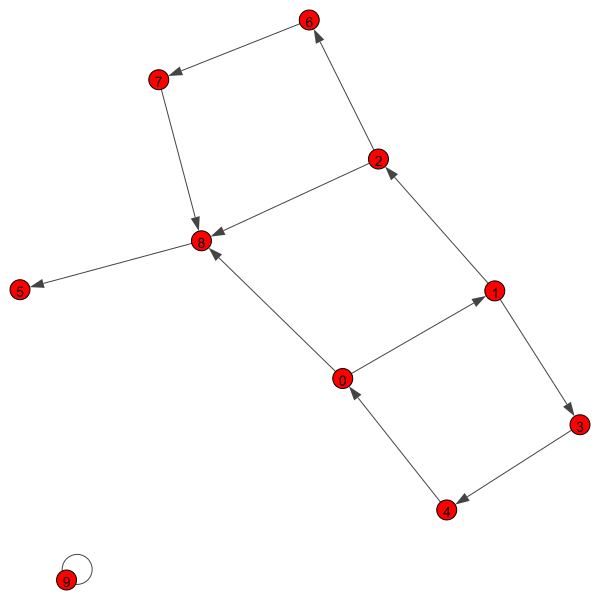

In [5]:
test_layout("auto")

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together (for example nodes 0 and 1, 2 and 8, ...). Edges have fairly similar lengths.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- The coordinates themselfes are pretty close together (all between 2 and -2).

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search.
For bigger numbers of nodes, the small distances between nodes may become an issue. It may be a good idea to scale them up to assure they are sufficiently different so small number problems - like floating point imprecision - don't play a role.


### Star layout


Calculated Coordinates: 
0 [0.0, 0.0]
1 [1.0, 0.0]
2 [0.766044443118978, 0.6427876096865393]
3 [0.17364817766693041, 0.984807753012208]
4 [-0.4999999999999998, 0.8660254037844387]
5 [-0.9396926207859083, 0.3420201433256689]
6 [-0.9396926207859084, -0.34202014332566866]
7 [-0.5000000000000004, -0.8660254037844385]
8 [0.17364817766692997, -0.9848077530122081]
Calculated Layout: 


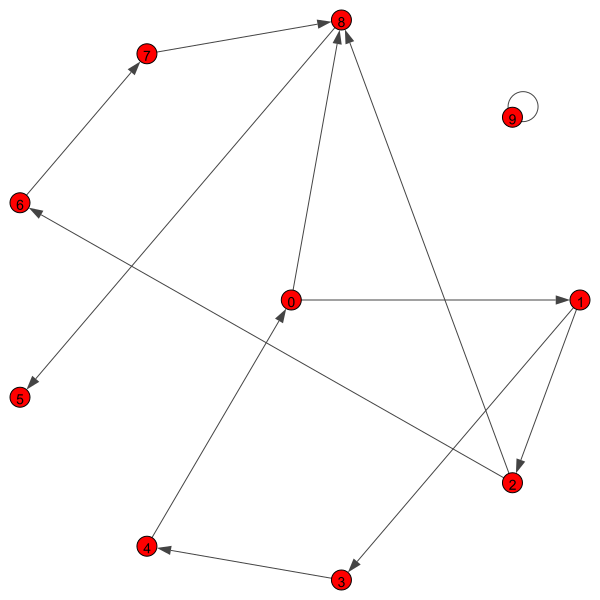

In [6]:
test_layout("star")

**Discussion**:
- The layout always consists of a circular configuration with 0 in the center.
- node positions are not influenced by edges.

**Verdict**:
This layout would not be helpful for heuristic search because it does not use edges to determine positions.

### Circle Layout

Calculated Coordinates: 
0 [1.0, 0.0]
1 [0.8090169943749475, 0.5877852522924731]
2 [0.30901699437494745, 0.9510565162951535]
3 [-0.30901699437494734, 0.9510565162951536]
4 [-0.8090169943749473, 0.5877852522924732]
5 [-1.0, 1.2246467991473532e-16]
6 [-0.8090169943749475, -0.587785252292473]
7 [-0.30901699437494756, -0.9510565162951535]
8 [0.30901699437494723, -0.9510565162951536]
Calculated Layout: 


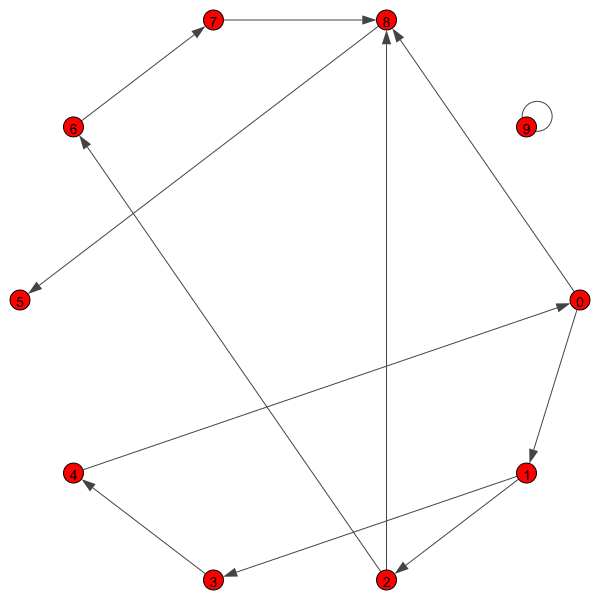

In [7]:
test_layout("circle")

**Discussion**:
- nodes are arranged in a circle
- positions are determined by the node id, not by edges

**Verdict**:
This layout would not be helpful for heuristic search because it does not use edges to determine positions.


### Grid Layout

Calculated Coordinates: 
0 [0.0, 0.0]
1 [1.0, 0.0]
2 [2.0, 0.0]
3 [3.0, 0.0]
4 [0.0, 1.0]
5 [1.0, 1.0]
6 [2.0, 1.0]
7 [3.0, 1.0]
8 [0.0, 2.0]
Calculated Layout: 


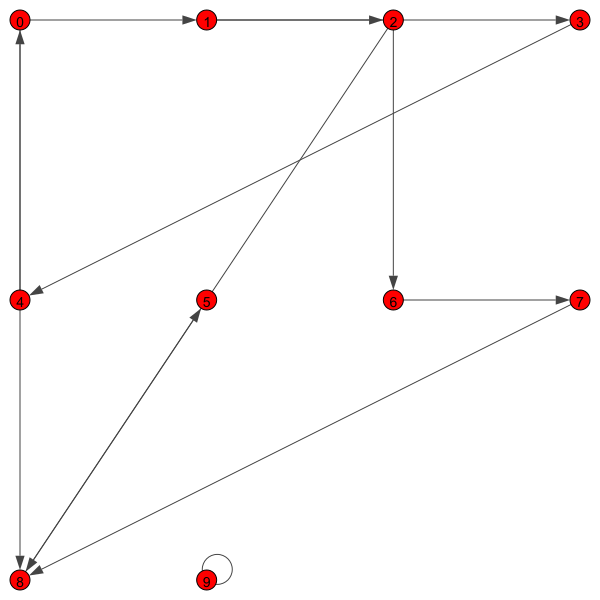

In [8]:
test_layout("grid")

**Discussion**:
- nodes are arranged in a grid
- positions are determined by the node id, not by edges

**Verdict**:
This layout would not be helpful for heuristic search because it does not use edges to determine positions.


### Davidson Harel

Calculated Coordinates: 
0 [-11.769891418209104, 7.253604202433174]
1 [-9.828882647785864, 10.276225322512735]
2 [-8.287585957589002, 7.017225524056979]
3 [-12.418851930215979, 12.551030118636511]
4 [-14.299746765948642, 9.73196399135209]
5 [-3.3081897921253285, 3.9306871180847054]
6 [-8.33615334435269, 1.112361129667073]
7 [-10.554978407067056, 2.174124776601334]
8 [-6.889166797792043, 4.306360121788925]
Calculated Layout: 


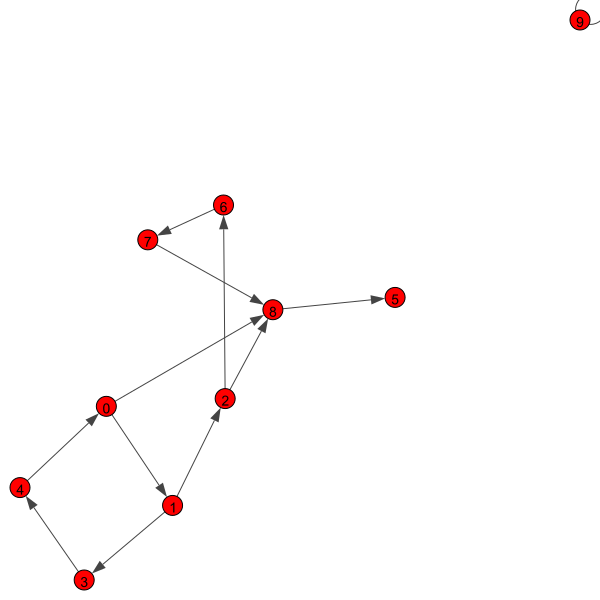

In [10]:
test_layout("davidson_harel")

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- In some visualization attempts, edges are of unequal length, but not exceeding the factor 5 restriction.
- Nodes seem to have a suitable distance from each other (all edges are longer than 1)

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search.

### DrL

Calculated Coordinates: 
0 [8.323163986206055, -18.541954040527344]
1 [7.875730514526367, -18.53909683227539]
2 [7.329463005065918, -18.933279037475586]
3 [8.987378120422363, -18.830646514892578]
4 [9.425168991088867, -18.863821029663086]
5 [8.109162330627441, -19.50312042236328]
6 [7.318563938140869, -19.963842391967773]
7 [7.1251606941223145, -20.242345809936523]
8 [7.534437656402588, -19.147327423095703]
Calculated Layout: 


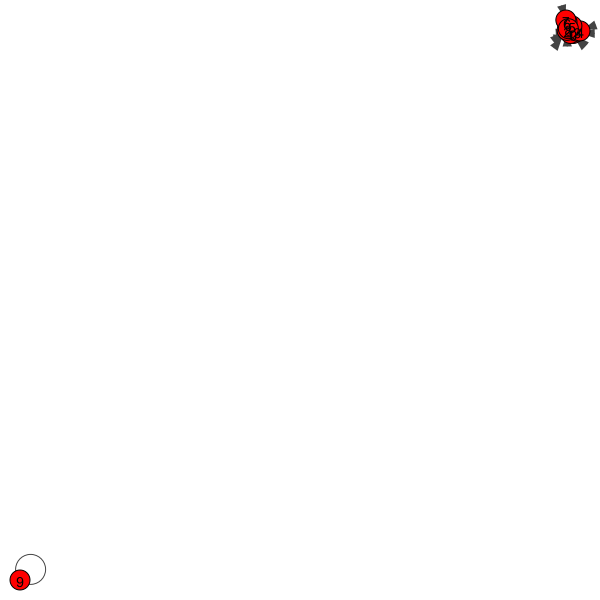

In [12]:
test_layout("drl")

**Discussion**:
- The layout is based on the connections of nodes. 
- Nodes that are connected to each other are very close together.
- Nodes that are unconnected, are placed further apart (e.g., Node 9).
- In a secondary experiment that excluded the node 9, the distances between nodes looked resonable.
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other (all edges are longer than 1)

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search.
The small distanced between the connected nodes may be problematic.

### Fruchterman Reingold

Calculated Coordinates: 
0 [0.4998104710890257, -0.38476559742505756]
1 [-0.6538041475919987, -0.4922919436102355]
2 [-0.7347584029093026, 0.7692120072339802]
3 [-0.5705216929550923, -1.617994713366319]
4 [0.49404734267279876, -1.5271408376208666]
5 [1.6509314464356843, 1.1286585630140238]
6 [-1.0846221132384006, 1.870694210932343]
7 [-0.04313720963337037, 2.0600010038029435]
8 [0.501568727534167, 0.9473542159274965]
Calculated Layout: 


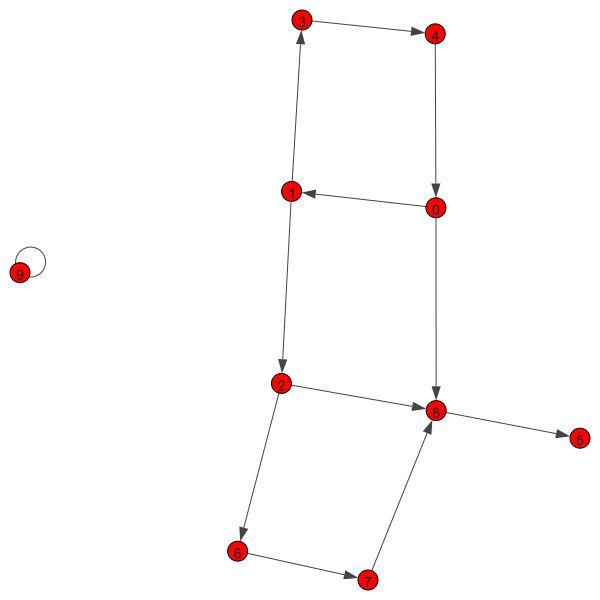

In [13]:
test_layout("fruchterman_reingold")

**Discussion**:
- the layout seems to be based on the connections of nodes. 
- connected nodesare generally close together
- edges are very close in length
- unconnected nodes are  placed further apart (e.g., Node 9).
- the layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- nodes seem to have a suitable distance from each other

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search algorithms.

### Graphopt

Calculated Coordinates: 
0 [-1.0636327440551328, -0.7070743099509903]
1 [-1.5791134962959326, 0.3415815109076366]
2 [-0.4817075231776547, 0.8985478942422003]
3 [-2.4445797141585537, -0.3785197241145094]
4 [-1.9791695836218939, -1.3531719230120156]
5 [0.42668522112933555, -1.4411681298673478]
6 [0.4416466597304801, 1.5439465301205662]
7 [1.0162888439002085, 0.6520010517678156]
8 [0.1300135812461234, -0.23351908786494857]
Calculated Layout: 


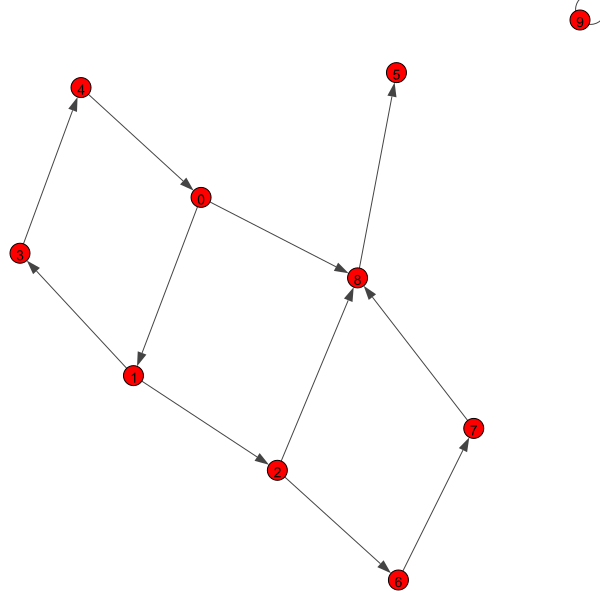

In [15]:
test_layout("fruchterman_reingold")

**Discussion**:
- the layout seems to be based on the connections of nodes. 
- connected nodes are generally close together
- edges are very close in length.
- unconnected nodes are placed further apart (e.g., Node 9).
- the layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- nodes seem to have a suitable distance from each other

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search algorithms.

### Kamada Kawai

Calculated Coordinates: 
0 [0.3198611235998333, 0.2625614546621845]
1 [-0.1537656117688888, 0.7699903735053222]
2 [-0.7263572661537128, 0.06795328571006469]
3 [0.8384332293394814, 1.136027851483433]
4 [0.28587431956661347, 1.284404787938428]
5 [-1.3175875885136017, -0.551702166256678]
6 [-0.8289340325689786, -0.97465303380299]
7 [-0.12039950221901956, -1.3016345845412427]
8 [-0.2617311869024127, -0.4490704142228435]
Calculated Layout: 


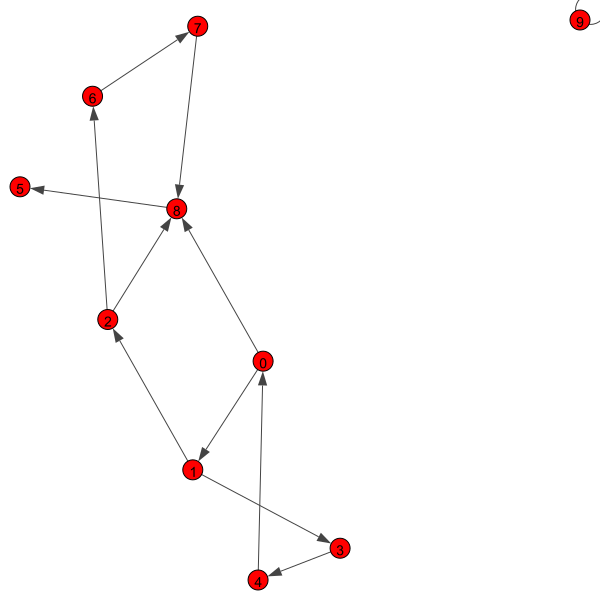

In [16]:
test_layout("kamada_kawai")

**Discussion**:
- the layout seems to be based on the connections of nodes. 
- connected nodes are generally close together
- edges are very close in length.
- unconnected nodes are placed further apart (e.g., Node 9).
- the layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- nodes seem to have a suitable distance from each other

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search algorithms.

### LGL

Calculated Coordinates: 
0 [-631840.572637132, 485326.52637287806]
1 [-633352.919668871, 485085.14314613555]
2 [-936623.4824935655, 238239.0452700696]
3 [-632848.9860409362, 485166.40813123673]
4 [-632345.0567751512, 485247.577586167]
5 [-233900.12577156388, -921580.8827751903]
6 [-936880.7734826785, 239025.12829873108]
7 [-594384.9151988324, 506413.6926424838]
8 [-1811.2322303553744, 117.26839286151014]
Calculated Layout: 


c:\Users\frank\Documents\Teaching\LU\Planning and Optimization LU - Material\Planning Example Project\planning_example_project\env\lib\site-packages\igraph\layout.py:691: RuntimeWarning: LGL layout does not support disconnected graphs yet. at src/layout/large_graph.c:179
  layout = func(*args, **kwds)


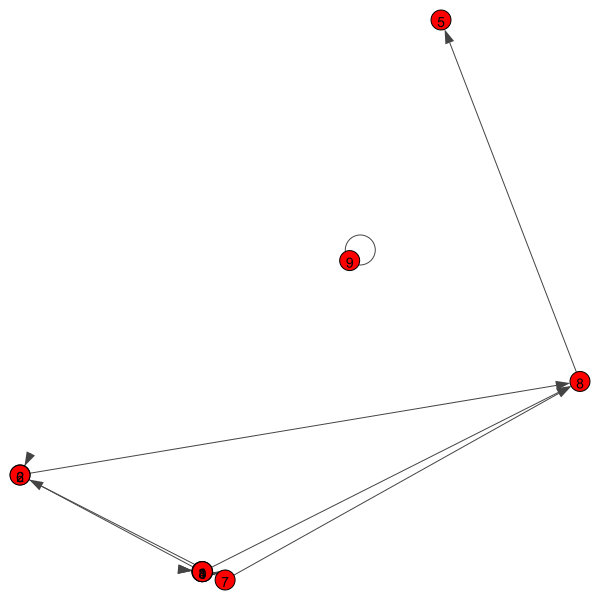

In [17]:
test_layout("lgl")

**Discussion**:
- the layout seems to be based on the connections of nodes
- connected nodes are generally close together
- edge length has significant differences. 
- the layout is non-deterministic. recalculating it with the same graph yields different layouts.

**Verdict**:
While this algorithm contains some useful information, the inconsistent distance may be problematic. For this reason, we will exclude this algorithm.

### MDS 

Calculated Coordinates: 
0 [0.6268738130921134, -2.2733593387053737]
1 [1.488596078272018, 1.1195959879122572]
2 [-1.293408792991234, 1.4073954311167116]
3 [4.115398740208962, 1.2321344806020416]
4 [2.968187861266104, -3.1723009329328278]
5 [-3.2934584822146338, -3.155501955951821]
6 [-3.1160689894114526, 3.1723009329328278]
7 [-4.115398740208962, -1.0291865609611464]
8 [-1.987093945657164, -1.7369795130060206]
Calculated Layout: 


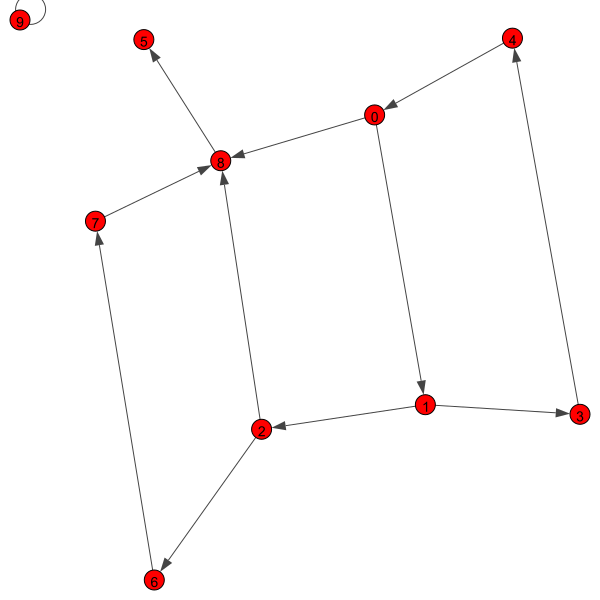

In [19]:
test_layout("mds")

**Discussion**:
- the layout seems to be based on the connections of nodes
- connected nodes are generally close together
- unconnected nodes are placed apart (e.g., Node 9).
- edges are similar in length but some are longer than others by a factor of 2 or 3
- the layout is non-deterministic. Recalculating it with the same graph yields different layouts.

**Verdict**:
Overall, this type of layout would probably be helpful for heuristic search algorithms.

### Summary

The following table summarizes our observation with respect to the main criteria.

| Layout | Edge-based Layout | Consistent Edge Length | Inclusion |
|--------|--------|  ------| ------ |
| auto | Yes | Yes| **Yes** |
| star | No | Yes | No|
| circle | No| Yes | No |
| grid | No| Yes | No |
| davidson_harel| Yes| Yes| **Yes**| 
| drl | Yes | Yes| **Yes**| 
| fruchterman_reingold| Yes | Yes| **Yes**| 
| graphopt| Yes | Yes | **Yes**| 
| kamada_kawai| Yes |Yes| **Yes**| 
| lgl | Yes| No | No |
| mds | Yes| Yes| **Yes**| 

## Discussion

According to the results of this experiment we will include the algorithms *auto*, *davidson_harel*, *drl*, *fruchterman_reingold*, *graphopt*, *kamada_kawai* and *mds* in further experiments.


In addition to the main results we noted the following during experiments:
- All included layouts have shown to be non-deterministic. This indicates that we need to test multiple variations.
- The layouts *fruchterman_reingold*, *graphopt* and *kamada_kawai* have shown the most consistent edge lengths in this experiment. This may be a property that is helpful for A*.
- The layouts *auto*,  *davidson_harel*, *fruchterman_reingold*, *kamada_kawai* and *mds* have resulted in nodes that are extremely close together. For a graph with 200.000 nodes, the differences between the coordinates may be small enough to become an issue. For this reason, we will scale their coordinates up by a value to be determined in future experiments.
